# Create RandomForestModel for the data

In [1]:
import os.path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
client_nr_list = [665045, 293156, 198591]

client_data = pd.read_csv(f'client_data/{client_nr_list[1]}/events.csv', sep='|')
client_data

,TIMESTAMP_EVENT,PRICE,PROPOSITION,USER_CLIENT_NUMBER,ARTICLE_CATEGORIE,USER_SESSION_ID,PROMOTION_LABEL,PAGE_NAME,PAGE_SECTION,PAGE_SECTION_POSITION,...,precipitation_coverage_lead_2,precipitation_amount_lead_2,temperature_lead_3,precipitation_coverage_lead_3,precipitation_amount_lead_3,temperature_lead_4,precipitation_coverage_lead_4,precipitation_amount_lead_4,total_spend_on_category_product,total_spend_on_product
0,2022-01-29T14:08:27.813Z,3.7488,950385,293156,"1,091,611,226",4667,NaN,Purchase List,Recommended Products,13.0,...,75.0,8.973,3.8,33.33,3.343,6.6,16.67,0.194,0.00,0.00
1,2022-01-29T14:08:27.867Z,2.3760,133368,293156,"1,031,161,481",4667,NaN,Purchase List,Recommended Products,9.0,...,75.0,8.973,3.8,33.33,3.343,6.6,16.67,0.194,0.00,0.00
2,2022-01-29T14:08:27.877Z,15.1140,495599,293156,"1,091,681,289",4667,NaN,Purchase List,Recommended Products,7.0,...,75.0,8.973,3.8,33.33,3.343,6.6,16.67,0.194,0.00,0.00
3,2022-01-29T14:08:27.861Z,3.6168,547498,293156,"1,091,611,309",4667,NaN,Purchase List,Recommended Products,8.0,...,75.0,8.973,3.8,33.33,3.343,6.6,16.67,0.194,0.00,0.00
4,2022-01-29T14:15:25.431Z,27.1788,215833,293156,"1,101,761,000",4667,40%25%20korting,Shopping Cart,Recommended Products,3.0,...,75.0,8.973,3.8,33.33,3.343,6.6,16.67,0.194,5574.37,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,2022-03-02T15:04:35.623Z,33.3960,76426,293156,"1,101,761,030",341677,NaN,NaN,NaN,NaN,...,0.0,0.000,0.1,0.00,0.000,-1.1,0.00,0.000,11260.30,153.33
507,2022-03-02T15:04:19.201Z,16.1700,628858,293156,"1,101,751,010",341677,NaN,NaN,NaN,NaN,...,0.0,0.000,0.1,0.00,0.000,-1.1,0.00,0.000,364.76,258.06
508,2022-03-02T15:03:34.997Z,26.7300,148852,293156,"1,112,111,080",341677,NaN,NaN,NaN,NaN,...,0.0,0.000,0.1,0.00,0.000,-1.1,0.00,0.000,0.00,0.00
509,2022-03-02T15:04:33.772Z,25.8192,822780,293156,"1,101,761,030",341677,NaN,NaN,NaN,NaN,...,0.0,0.000,0.1,0.00,0.000,-1.1,0.00,0.000,11260.30,205.06


In [3]:
df_proposition_article_categorie = client_data[['PROPOSITION', 'ARTICLE_CATEGORIE']]
df_proposition_article_categorie.head()

,PROPOSITION,ARTICLE_CATEGORIE
0,950385,"1,091,611,226"
1,133368,"1,031,161,481"
2,495599,"1,091,681,289"
3,547498,"1,091,611,309"
4,215833,"1,101,761,000"


In [4]:
client_purchase_data = pd.read_csv(f'client_data/{client_nr_list[1]}/purchases.csv', sep='|')
client_purchase_data

,USER_CLIENT_NUMBER,DATE,PROPOSITION,AMOUNT,NUMBER_OF_TIMES_SEEN_30_days,NUMBER_OF_TIMES_SEEN_7_days,NUMBER_OF_TIMES_SEEN_1_days,ARTICLE_CATEGORIE
0,293156,2022-03-03,53735,18.40,1,1,1,"1,101,751,010"
1,293156,2021-11-04,53735,26.49,0,0,0,"1,101,751,010"
2,293156,2021-10-07,53735,17.66,0,0,0,"1,101,751,010"
3,293156,2021-10-28,53735,8.83,0,0,0,"1,101,751,010"
4,293156,2022-03-31,53735,27.60,3,1,1,"1,101,751,010"
...,...,...,...,...,...,...,...,...
588,293156,2021-10-11,634284,18.98,0,0,0,"1,101,771,050"
589,293156,2022-01-31,634284,18.98,1,1,0,"1,101,771,050"
590,293156,2022-03-19,469857,26.80,1,1,1,"1,112,001,070"
591,293156,2021-10-23,95492,17.01,0,0,0,"1,112,001,070"


In [5]:
event_data = pd.read_csv('processed_data/processed_events_final.csv', sep='|')
event_data

/var/folders/f3/ykt1vfz96xz48try_trwdn440000gn/T/ipykernel_20086/1571048280.py:1: DtypeWarning: Columns (6,24) have mixed types. Specify dtype option on import or set low_memory=False.
  event_data = pd.read_csv('processed_data/processed_events_final.csv', sep='|')


,TIMESTAMP_EVENT,PRICE,PROPOSITION,USER_CLIENT_NUMBER,ARTICLE_CATEGORIE,USER_SESSION_ID,PROMOTION_LABEL,PAGE_NAME,PAGE_SECTION,PAGE_SECTION_POSITION,...,precipitation_coverage_lead_2,precipitation_amount_lead_2,temperature_lead_3,precipitation_coverage_lead_3,precipitation_amount_lead_3,temperature_lead_4,precipitation_coverage_lead_4,precipitation_amount_lead_4,total_spend_on_category_product,total_spend_on_product
0,2022-02-28T14:51:25.349Z,25.4760,554657,386730,"1,081,511,193",933,Actie,Shopping Cart,Recommended Products,2.0,...,0.0,0.0,2.9,0.0,0.0,1.8,0.0,0.0,0.0,0.00
1,2022-02-28T14:51:46.443Z,25.4760,554657,386730,"1,081,511,193",933,Actie,Shopping Cart,Recommended Products,2.0,...,0.0,0.0,2.9,0.0,0.0,1.8,0.0,0.0,0.0,0.00
2,2022-02-28T14:52:06.207Z,25.4760,554657,386730,"1,081,511,193",933,Actie,Shopping Cart,Recommended Products,2.0,...,0.0,0.0,2.9,0.0,0.0,1.8,0.0,0.0,0.0,0.00
3,2022-02-28T14:52:06.211Z,12.5268,349240,386730,"1,091,661,078",933,Actie,Shopping Cart,Recommended Products,1.0,...,0.0,0.0,2.9,0.0,0.0,1.8,0.0,0.0,0.0,0.00
4,2022-02-28T14:51:25.319Z,12.5268,349240,386730,"1,091,661,078",933,Actie,Shopping Cart,Recommended Products,1.0,...,0.0,0.0,2.9,0.0,0.0,1.8,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9935804,2022-01-28T15:48:08.723Z,35.7192,87264,804960,"1,081,451,429",319213,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,196.88
9935805,2022-01-28T15:46:27.480Z,17.1204,594422,804960,"1,011,031,135",319213,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,734.58
9935806,2022-01-28T15:48:43.837Z,18.2424,8749,804960,"1,011,011,555",319213,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,941.96
9935807,2022-01-28T15:48:53.241Z,1.6500,255956,804960,"1,031,161,491",319213,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,61.05


In [6]:
#replace the nan values with 0
event_data = event_data.fillna(0)

In [7]:
import pandas as pd

# Assuming event_data is already defined
event_data_to_analyze = event_data.drop(["TIMESTAMP_EVENT", "PAGE_SECTION_POSITION"], axis=1)

# Convert the "date" column to datetime, coerce errors to NaT
event_data_to_analyze["date"] = pd.to_datetime(event_data_to_analyze["date"], errors='coerce')

# Handle invalid dates (optional): remove rows with NaT in "date" column

# Add a new column for the day of the week
event_data_to_analyze["day_of_week"] = event_data_to_analyze["date"].dt.dayofweek

# Display the dataframe
event_data_to_analyze

,PRICE,PROPOSITION,USER_CLIENT_NUMBER,ARTICLE_CATEGORIE,USER_SESSION_ID,PROMOTION_LABEL,PAGE_NAME,PAGE_SECTION,PROMOTION_PRICE,PRODUCT_TYPE,...,precipitation_amount_lead_2,temperature_lead_3,precipitation_coverage_lead_3,precipitation_amount_lead_3,temperature_lead_4,precipitation_coverage_lead_4,precipitation_amount_lead_4,total_spend_on_category_product,total_spend_on_product,day_of_week
0,25.4760,554657,386730,"1,081,511,193",933,Actie,Shopping Cart,Recommended Products,25.014,Meepakker,...,0.0,2.9,0.0,0.0,1.8,0.0,0.0,0.0,0.00,0.0
1,25.4760,554657,386730,"1,081,511,193",933,Actie,Shopping Cart,Recommended Products,25.014,Meepakker,...,0.0,2.9,0.0,0.0,1.8,0.0,0.0,0.0,0.00,0.0
2,25.4760,554657,386730,"1,081,511,193",933,Actie,Shopping Cart,Recommended Products,25.014,Meepakker,...,0.0,2.9,0.0,0.0,1.8,0.0,0.0,0.0,0.00,0.0
3,12.5268,349240,386730,"1,091,661,078",933,Actie,Shopping Cart,Recommended Products,11.220,Meepakker,...,0.0,2.9,0.0,0.0,1.8,0.0,0.0,0.0,0.00,0.0
4,12.5268,349240,386730,"1,091,661,078",933,Actie,Shopping Cart,Recommended Products,11.220,Meepakker,...,0.0,2.9,0.0,0.0,1.8,0.0,0.0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9935804,35.7192,87264,804960,"1,081,451,429",319213,0,0,0,0.000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,196.88,NaN
9935805,17.1204,594422,804960,"1,011,031,135",319213,0,0,0,0.000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,734.58,NaN
9935806,18.2424,8749,804960,"1,011,011,555",319213,0,0,0,0.000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,941.96,NaN
9935807,1.6500,255956,804960,"1,031,161,491",319213,0,0,0,0.000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61.05,NaN


# We will create a binary column for the reward, where 1 means that the reward was greater than 0 and 0 means that the reward was 0

In [8]:
# Vectorized operations to create binary columns
event_data_to_analyze['purchased_7_days_after_binary'] = (event_data_to_analyze['purchases_7_day_after'] > 0).astype(int)
event_data_to_analyze['purchased_30_days_after_binary'] = (event_data_to_analyze['purchases_30_day_after'] > 0).astype(int)


# encode the text based columns, of which we will save a dictionary for later use to decode the values

In [9]:
def data_events_to_categories_dict_creation(data_events):
    """
    Create a dictionary with the columns as keys and the values as a dictionary with the unique values as keys and the category number as values
    Args:
        data_events: 

    Returns:

    """
    transformation_dict = {}
    for col in ["PAGE_NAME", "PAGE_SECTION", "PRODUCT_TYPE", "DEVICE_INFO_BRAND", "DEVICE_INFO_TYPE", "DEVICE_INFO_BROWSER", "PROMOTION_LABEL", "USER_SALES_GROUP", "USER_SEGMENT", "USER_SALES_DISTRICT", "EVENT"]:
        unique_col_values = data_events[col].unique()
        
        category_number = 0
        transformation_dict[col] = {}
        for col_value in unique_col_values:
            transformation_dict[col][col_value] = category_number
            category_number +=1
    return transformation_dict



def get_inverse_transformation_dict(transformation_dict):
    """
    Create a dictionary with the columns as keys and the values as a dictionary with the category number as keys and the unique values as values
    Args:
        transformation_dict: 

    Returns:

    """
    #inverse of transformation dict
    inverse_transformation_dict = {}
    for col_name, dict_vals in transformation_dict.items():
        inverse_transformation_dict[col_name] = {}
        for dict_val, cat_num in dict_vals.items():
            inverse_transformation_dict[col_name][cat_num] = dict_val
            
    return inverse_transformation_dict



def transform_df_to_categories(events_table,  inverse_or_transformation_dict, to_categories=True):
    """
    Replace categorical values using map based on the inverse or transformation dict that is passed from the function
    Args:
        events_table: 
        inverse_or_transformation_dict: 
        to_categories: 

    Returns:

    """

    if to_categories:
        for column, mapping in inverse_or_transformation_dict.items():
            events_table[column] = events_table[column].map(lambda x: mapping[x])
    else:
        for column, mapping in inverse_or_transformation_dict.items():
            events_table[column] = events_table[column].map(lambda x: mapping[x])
    return events_table
        
# Replace categorical values using map
transformation_dict = data_events_to_categories_dict_creation(event_data_to_analyze)
inverse_transformation_dict = get_inverse_transformation_dict(transformation_dict)

    
transformed_event_df = transform_df_to_categories(event_data_to_analyze, transformation_dict, to_categories=True)
transformed_event_df.head()

,PRICE,PROPOSITION,USER_CLIENT_NUMBER,ARTICLE_CATEGORIE,USER_SESSION_ID,PROMOTION_LABEL,PAGE_NAME,PAGE_SECTION,PROMOTION_PRICE,PRODUCT_TYPE,...,precipitation_coverage_lead_3,precipitation_amount_lead_3,temperature_lead_4,precipitation_coverage_lead_4,precipitation_amount_lead_4,total_spend_on_category_product,total_spend_on_product,day_of_week,purchased_7_days_after_binary,purchased_30_days_after_binary
0,25.4760,554657,386730,"1,081,511,193",933,0,0,0,25.014,0,...,0.0,0.0,1.8,0.0,0.0,0.0,0.0,0.0,0,0
1,25.4760,554657,386730,"1,081,511,193",933,0,0,0,25.014,0,...,0.0,0.0,1.8,0.0,0.0,0.0,0.0,0.0,0,0
2,25.4760,554657,386730,"1,081,511,193",933,0,0,0,25.014,0,...,0.0,0.0,1.8,0.0,0.0,0.0,0.0,0.0,0,0
3,12.5268,349240,386730,"1,091,661,078",933,0,0,0,11.220,0,...,0.0,0.0,1.8,0.0,0.0,0.0,0.0,0.0,0,0
4,12.5268,349240,386730,"1,091,661,078",933,0,0,0,11.220,0,...,0.0,0.0,1.8,0.0,0.0,0.0,0.0,0.0,0,0


In [10]:
transformed_event_df.columns

Index(['PRICE', 'PROPOSITION', 'USER_CLIENT_NUMBER', 'ARTICLE_CATEGORIE',
       'USER_SESSION_ID', 'PROMOTION_LABEL', 'PAGE_NAME', 'PAGE_SECTION',
       'PROMOTION_PRICE', 'PRODUCT_TYPE', 'DEVICE_INFO_BRAND',
       'DEVICE_INFO_TYPE', 'DEVICE_INFO_BROWSER', 'USER_SALES_GROUP',
       'USER_SEGMENT', 'USER_SALES_DISTRICT', 'USER_PROMOTIONS_ALLOWED',
       'EVENT', 'DATE', 'TIME', 'purchases_7_day_after',
       'purchases_30_day_after', 'date', 'temperature', 'precipcover',
       'precip', 'temperature_lead_1', 'precipitation_coverage_lead_1',
       'precipitation_amount_lead_1', 'temperature_lead_2',
       'precipitation_coverage_lead_2', 'precipitation_amount_lead_2',
       'temperature_lead_3', 'precipitation_coverage_lead_3',
       'precipitation_amount_lead_3', 'temperature_lead_4',
       'precipitation_coverage_lead_4', 'precipitation_amount_lead_4',
       'total_spend_on_category_product', 'total_spend_on_product',
       'day_of_week', 'purchased_7_days_after_binary',

# Visualize the columns and their correlation with the reward

In [11]:
# Compute the correlation matrix
columns_corr =['temperature', 'precipcover',
       'precip', 'temperature_lead_1', 'precipitation_coverage_lead_1',
       'precipitation_amount_lead_1', 'temperature_lead_2',
       'precipitation_coverage_lead_2', 'precipitation_amount_lead_2',
       'temperature_lead_3', 'precipitation_coverage_lead_3',
       'precipitation_amount_lead_3', 'temperature_lead_4',
       'precipitation_coverage_lead_4', 'precipitation_amount_lead_4',
       'total_spend_on_category_product', 'total_spend_on_product',
       'day_of_week', 'purchased_7_days_after_binary']

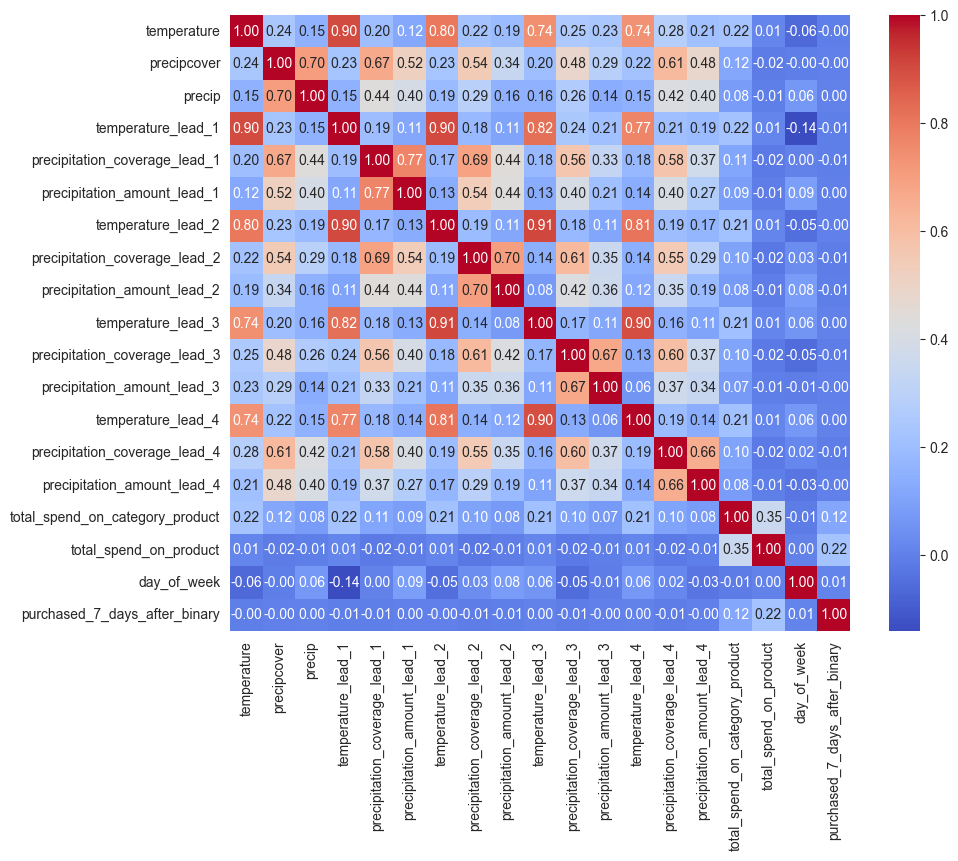

In [12]:
# Compute the correlation matrix
correlational_df = transformed_event_df.drop(columns=["ARTICLE_CATEGORIE", 'DATE', "TIME"])

corr = correlational_df[columns_corr].corr()
#rul_correlation = correlation_matrix['RUL']


# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Show plot
plt.show()

# We will now create a model that will predict the reward of a event
We will use a random forest model to do so

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


### Let us first take a even more tiny sample of the data to test the model

In [14]:
import json
def write_output_parameters_to_file(file_path, parameters):
    """
    Write the parameters to a file
    Args:
        file_path: 
        parameters: 

    Returns:

    """
    with open(file_path, 'a') as file:
        file.write(json.dumps(parameters))

In [15]:
frac = 0.2

tiny_transformed_event_df = transformed_event_df.sample(frac=frac, random_state=42)

independent_variables = tiny_transformed_event_df.drop(
    columns=["purchases_7_day_after", "purchases_30_day_after", "purchased_7_days_after_binary",
             "purchased_30_days_after_binary", "DATE", "TIME", "EVENT", "ARTICLE_CATEGORIE", "date", "PAGE_NAME", "PRODUCT_TYPE"])
dependent_variable = tiny_transformed_event_df["purchased_7_days_after_binary"]

X_train, X_test, y_train, y_test = train_test_split(independent_variables, dependent_variable, test_size=0.2,
                                                    random_state=42)

In [29]:
X_train.shape

(1589729, 32)

In [18]:
from skopt import BayesSearchCV
from skopt.callbacks import EarlyStopper

from sklearn.ensemble import RandomForestRegressor

def select_parameters_bayesian_optimization(x_train, y_train, n_iterations=100,  no_parameters_tuning_custom_parameters=False):
    """
    This function will perform Bayesian optimization to find the best parameters for the random forest model.
    :param x_train: Training features.
    :param y_train: Training labels.
    :param n_iterations: Number of parameter settings that are sampled in BayesSearchCV.
    :return: The best model after fitting and the best parameters found.
    """
    if no_parameters_tuning_custom_parameters:
        
        parameters = {
        "n_estimators": 672,
        "max_depth": 68,
        "min_samples_split": 2,
        "min_samples_leaf": 3,
        "max_features": "sqrt",
        "bootstrap": False
    }
        # Model definition
        model = RandomForestRegressor(**parameters, n_jobs=-1)
        model.fit(x_train, y_train)
        
        return model, None
    
    param_grid = {
        'n_estimators': (100, 1000),
        'max_depth': (10, 100),
        'min_samples_split': (2, 20),
        'min_samples_leaf': (1, 10),
        'max_features': [1, 'sqrt', 'log2'],
        'bootstrap': [True, False]
    }
    
    
    
    model = RandomForestRegressor()
    bayes_search = BayesSearchCV(estimator=model, search_spaces=param_grid, n_iter=n_iterations, cv=3, random_state=42, verbose=2, n_jobs=-1)
    bayes_search.fit(x_train, y_train)
    
    
    return bayes_search, n_iterations

# Example usage:
model, n_iterations = select_parameters_bayesian_optimization(X_train, y_train, n_iterations=100, no_parameters_tuning_custom_parameters=True)
try:
    print(f"Best parameters: {model.best_params_}")
except:
    print("Model is trained with default parameters")


Model is trained with default parameters


In [52]:
model.best_params_

OrderedDict([('bootstrap', False),
             ('max_depth', 68),
             ('max_features', 'sqrt'),
             ('min_samples_leaf', 3),
             ('min_samples_split', 2),
             ('n_estimators', 672)])

In [20]:
# confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [21]:
def predict_y_values(model_rf, x_test, y_test, select_only_recommendation_page=False, probablity_threshold=0.5):
    """
    Predict the y values using the model and the test features.
    :param model_rf: The model to use for prediction.
    :param x_test: The test features.
    :param y_test: The test labels.
    :param select_only_recommendation_page: If True, only predict for events from the recommendation page.
    :param probablity_threshold: The threshold for rounding the predicted values.
    :return: The predicted y values.
    """
    if select_only_recommendation_page:
        x_test, y_test = x_test[x_test["PAGE_SECTION"] != 0], y_test[x_test["PAGE_SECTION"] != 0]
    
    y_pred = model_rf.predict(x_test)

    # Calculate the mean squared error
    mse = mean_squared_error(y_test, y_pred)
    
    # Calculate the mean absolute error
    mae = mean_absolute_error(y_test, y_pred)
    
    # Calculate the R2 score
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R2 Score: {r2}")
    
    # make the rounding only work if larger than 0.7
    y_pred_rounded = np.where(y_pred > probablity_threshold, 1, 0)
    

    
    # Create confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred_rounded)
    
    # Create classification report
    class_report = classification_report(y_test, y_pred_rounded)
    
    
    
    print(f"Confusion Matrix:\n{conf_matrix}")
    
    print(f"Classification Report:\n{class_report}")
    
    
    result_parameters = {
        "select_only_recommendation_page": select_only_recommendation_page,
        "probablity_threshold": probablity_threshold,
        "mse": mse,
        "mae": mae,
        "r2": r2,
        "confusion_matrix": conf_matrix.tolist(),
        "classification_report": class_report
        
    }
    
    
    
    return x_test, y_test, y_pred, y_pred_rounded, result_parameters
x_test_out, y_test_out, y_pred_out, y_pred_rounded, result_parameters = predict_y_values(model, X_test, y_test, select_only_recommendation_page=True, probablity_threshold=0.78)

Mean Squared Error: 0.05463873760125266
Mean Absolute Error: 0.11567656968990937
R2 Score: 0.21846993387196312
Confusion Matrix:
[[  8779  10552]
 [ 12474 223785]]
Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.45      0.43     19331
           1       0.95      0.95      0.95    236259

    accuracy                           0.91    255590
   macro avg       0.68      0.70      0.69    255590
weighted avg       0.91      0.91      0.91    255590



In [22]:
np.average(y_pred_rounded)

0.9168472944950898

In [76]:
y_test_out

3040113    0
959395     0
63072      0
6463139    1
8690574    1
          ..
6382007    1
2039997    1
4407665    1
2001501    1
7561389    0
Name: purchased_7_days_after_binary, Length: 12790, dtype: int64

In [23]:
parameters = {
    "fraction_of_data": frac,
    "n_iterations": n_iterations,
    "result_parameters": result_parameters,
    "model_parameters":{
    'n_estimators': model.best_params_['n_estimators'],
    'max_depth': model.best_params_['max_depth'],
    'min_samples_split': model.best_params_['min_samples_split'],
    'min_samples_leaf': model.best_params_['min_samples_leaf'],
    'max_features': model.best_params_['max_features'],
    'bootstrap': model.best_params_['bootstrap']
    }
}

write_output_parameters_to_file("processed_data/parameter_documentation.json", parameters)
print(json.dumps(parameters, indent=4))


AttributeError: 'RandomForestRegressor' object has no attribute 'best_params_'

In [93]:

# make the rounding only work if larger than 0.7
y_pred_rounded_recommendation = np.where(y_pred_recommendation_page > 0.73, 1, 0)

y_pred_rounded_recommendation

array([1, 0, 0, ..., 1, 1, 1])

In [94]:
print(len([x for x in y_pred_rounded_recommendation if x == 1]))
print(len([x for x in y_pred_rounded_recommendation if x == 0]))

11804
986


In [24]:
print(len([x for x in y_test_out if x == 1]))

236259


In [25]:
print(len([x for x in y_test_out if x == 0]))

19331


In [ ]:
importances = model.feature_importances_
feature_names = independent_variables.columns  # Replace this with your feature names if available

# Print the feature names and their importance scores
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.4f}")

import matplotlib.pyplot as plt
import numpy as np

indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [26]:
importances = model.feature_importances_
feature_names = independent_variables.columns  # Replace this with your feature names if available

# Print the feature names and their importance scores
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.4f}")


PRICE: 0.0217
PROPOSITION: 0.0121
USER_CLIENT_NUMBER: 0.0123
USER_SESSION_ID: 0.0131
PROMOTION_LABEL: 0.0345
PAGE_SECTION: 0.5257
PROMOTION_PRICE: 0.0470
DEVICE_INFO_BRAND: 0.0016
DEVICE_INFO_TYPE: 0.0007
DEVICE_INFO_BROWSER: 0.0073
USER_SALES_GROUP: 0.0061
USER_SEGMENT: 0.0029
USER_SALES_DISTRICT: 0.0061
USER_PROMOTIONS_ALLOWED: 0.0013
temperature: 0.0025
precipcover: 0.0008
precip: 0.0012
temperature_lead_1: 0.0036
precipitation_coverage_lead_1: 0.0009
precipitation_amount_lead_1: 0.0009
temperature_lead_2: 0.0029
precipitation_coverage_lead_2: 0.0006
precipitation_amount_lead_2: 0.0007
temperature_lead_3: 0.0017
precipitation_coverage_lead_3: 0.0007
precipitation_amount_lead_3: 0.0007
temperature_lead_4: 0.0022
precipitation_coverage_lead_4: 0.0010
precipitation_amount_lead_4: 0.0010
total_spend_on_category_product: 0.0231
total_spend_on_product: 0.2588
day_of_week: 0.0042


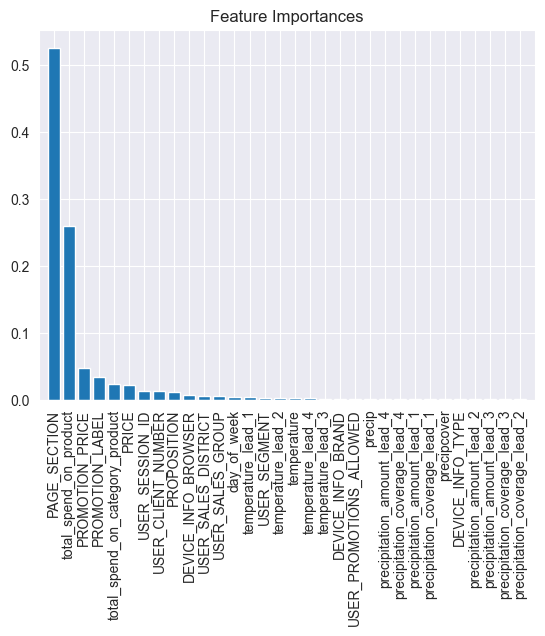

In [27]:
import matplotlib.pyplot as plt
import numpy as np

indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


# Save the model

In [28]:
import pickle
import os
# save the model
for i in range(10):
    file_path = f"models/reward_predictor_model_final_{i}.pkl"
    print(os.path.exists(file_path))



    if not os.path.exists(file_path):
        print(file_path)
        file_path = "models/reward_predictor_model_weather_" + str(i) + ".pkl"
        with open(file_path, 'wb') as file:
            pickle.dump(model, file)
            break
    


False
models/reward_predictor_model_final_0.pkl
